In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from test_fonts import *
from NeuralNetwork import  *
from time import perf_counter
import plots

## Loading Dataset

In [2]:
fonts = get_all_fonts(2,True)
font_count = len(fonts)
font_count

5

## Creating Autoencoder

In [3]:
beta = 0.5

sigmoid = lambda e: 1 / (1 + np.exp(-e * 2 * beta))
sigmoid_derived = lambda e: 2 * beta * sigmoid(e) * (1 - sigmoid(e))

tanh = lambda e: math.tanh(e)
tanh_derived = lambda  e: 1- math.tanh(e)**2



def activation(e):
    return tanh(e)

def derivative(e):
    return tanh_derived(e)




## Generating training dataset

In [146]:
errors = []
for i in range(1):
    print(f'\n {i}:')
    nn = NNBuilder\
        .with_input(7*5)\
        .with_hidden_layer(20,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(2,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(20,activation,derivative)\
        .with_output_layer(7*5,activation,derivative)
    # np.random.shuffle(fonts)
    # idx = math.floor(font_count * 0.5)
    idx=5
    training, test = np.array(fonts[:idx]), np.array(fonts[idx:])

    t0 = perf_counter()
    training_errors, ws = nn.train_on_dataset(training, training, 100)
    tf = perf_counter()
    print(f'execution time: {tf-t0} s')
    print(f"training error: {training_errors}")
    errors.append(training_errors)


 0:
ITERATION 1
ITERATION 2
ITERATION 3
ITERATION 4
ITERATION 5
ITERATION 6
ITERATION 7
ITERATION 8
ITERATION 9
ITERATION 10
ITERATION 11
ITERATION 12
ITERATION 13
ITERATION 14
ITERATION 15
ITERATION 16
ITERATION 17
ITERATION 18
ITERATION 19
ITERATION 20
ITERATION 21
ITERATION 22
ITERATION 23
ITERATION 24
ITERATION 25
ITERATION 26
ITERATION 27
ITERATION 28
ITERATION 29
ITERATION 30
ITERATION 31
ITERATION 32
ITERATION 33
ITERATION 34
ITERATION 35
ITERATION 36
ITERATION 37
ITERATION 38
ITERATION 39
ITERATION 40
ITERATION 41
ITERATION 42
ITERATION 43
ITERATION 44
ITERATION 45
ITERATION 46
ITERATION 47
ITERATION 48
ITERATION 49
ITERATION 50
ITERATION 51
ITERATION 52
Optimization terminated successfully.
         Current function value: 0.014379
         Iterations: 52
         Function evaluations: 1398842
execution time: 1052.660505400001 s
training error: 0.014379320818354403


In [95]:
errors = [round(e, 4) for e in errors]
print(f'errors: {errors}')
print(f'avg: {format(np.average(errors), ".4f")}')
print(f'min: {format(np.min(errors), ".4f")}')
print(f'max: {format(np.max(errors), ".4f")}')

errors: [0.2161, 0.0563, 0.0751, 0.0693, 0.0605, 0.1216, 0.1204, 0.0735, 0.0757, 0.102, 0.0068, 0.2235, 0.1265, 0.088, 0.0945, 0.1454, 0.0718, 0.0841, 0.0766, 0.0454]
avg: 0.0967
min: 0.0068
max: 0.2235


In [115]:
# para agregar seguir iterando sin resetear la red (a chequear)
t0 = perf_counter()
training_errors, ws = nn.train_on_dataset(training, training, 20)
tf = perf_counter()
print(f'execution time: {tf-t0} s')
print(f"training error: {training_errors}")
# print(f"testing error: {nn.get_error_on_dataset(test, test)}")

ITERATION 47
Optimization terminated successfully.
         Current function value: 0.014380
         Iterations: 1
         Function evaluations: 26416
execution time: 21.701062099999945 s
training error: 0.014380307818925612


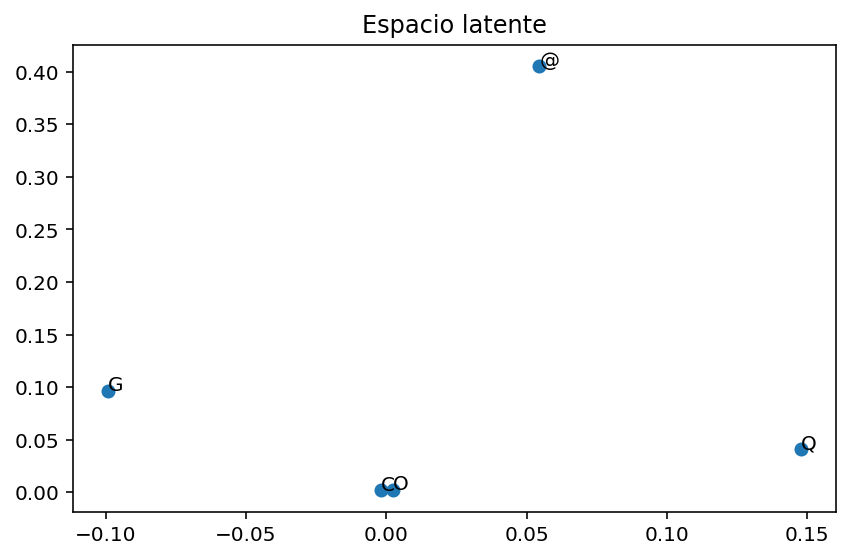

In [147]:
labels = ["@", "C", "G", "O", "Q"]

outputs = []
latent_space_list = []
latent_space_layer = int(np.ceil(nn.layer_count / 2))

for font in training:
    layers_outputs = nn.feed_forward(font)
    outputs.append(layers_outputs[-1])
    latent_space_list.append(layers_outputs[latent_space_layer])

    # print(print_character(font.reshape(7, 5)))
    # print(print_character(layers_outputs[-1].reshape(7, 5)))

plots.plot_latent_space(latent_space_list, labels)

In [188]:
g = latent_space_list[2]
at = latent_space_list[0]
step_qty = 20

step = np.subtract(at, g) / step_qty

print(g)
print(at)
print(step)

points = [at]
characters = []

for i in range(step_qty):
    input = (g[0] + step[0] * i, g[1] + step[1] * i)
    characters.append(nn.feed_forward(input, encode=False)[-1])
    points.append(input)

[-0.09926793  0.09652872]
[0.05446701 0.40542111]
[0.00768675 0.01544462]


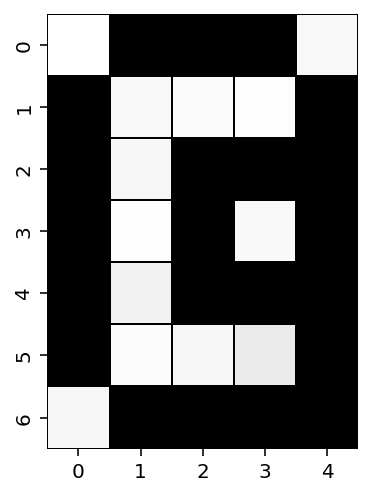

In [203]:
print_character(characters[10].reshape(7,5))

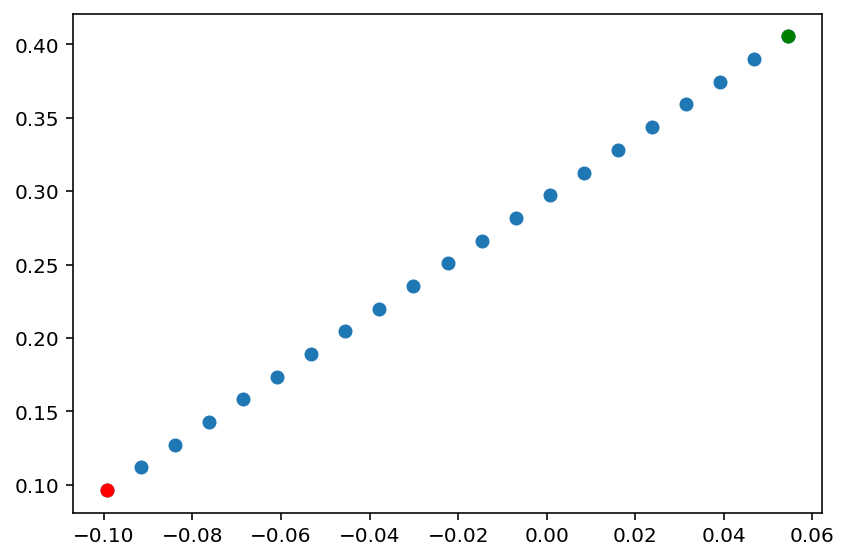

In [189]:
x = []
y = []

for ls in points:
    x.append(ls[0])
    y.append(ls[1])

plt.scatter(x, y)
plt.scatter(g[0], g[1], color='red')
plt.scatter(at[0], at[1], color='green')

plt.tight_layout()
plt.show()

None


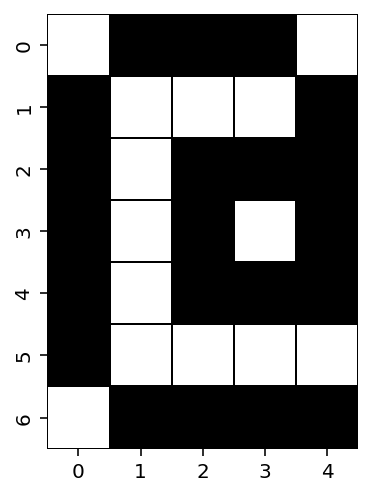

In [131]:
aa = training[0]
value = nn.feed_forward(aa)[-1]
print(print_character(aa.reshape(7,5)))

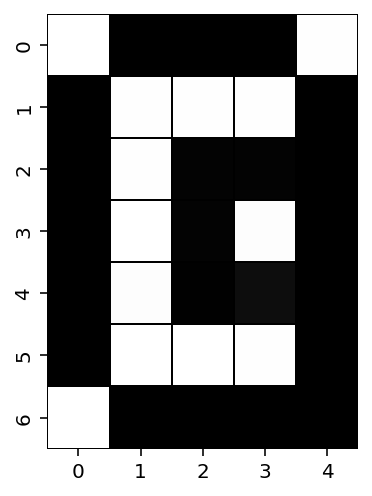

In [132]:
print_character(value.reshape(7,5))